This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

Swathi Suragowni Ravindranath

NEURAL NETWORKS_Assignment1






### The IMDB dataset

**Loading the IMDB dataset**

In [35]:
!pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
!pip install keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [37]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [38]:
train_labels[0]

1

In [39]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [40]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [41]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [42]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [43]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [44]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Step 1 :
1.Sequential Three layered approach

2.Replaced relu with tanh

3.optimizers changed to adam and loss to mse and metrics == accuracy

### Building your model

**Model definition**

In [45]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(16, activation="tanh"))
model.add(Dense(16, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [46]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 59ms/step - loss: 0.1747 - accuracy: 0.7811 - val_loss: 0.1182 - val_accuracy: 0.8584
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0823 - accuracy: 0.9067 - val_loss: 0.0890 - val_accuracy: 0.8839
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0531 - accuracy: 0.9419 - val_loss: 0.0833 - val_accuracy: 0.8857
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0381 - accuracy: 0.9620 - val_loss: 0.0834 - val_accuracy: 0.8854
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0278 - accuracy: 0.9757 - val_loss: 0.0858 - val_accuracy: 0.8825
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0210 - accuracy: 0.9833 - val_loss: 0.0892 - val_accuracy: 0.8788
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0166 - accuracy: 0.9877 - val_loss: 0.0935 - val_accuracy: 0.8758
Epoch 8/20
30

**Compiling the model**

**Plotting the training and validation loss**

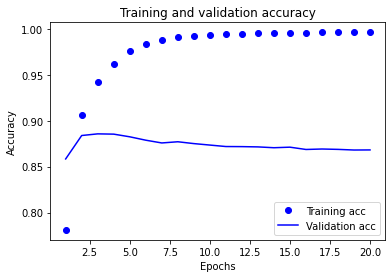

In [51]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

**Retraining a model from scratch**

In [52]:
# Step 2 

### implement dropouts and Regularizers
### check performance by changing the dense layers to 64 hidden units

from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers


model = keras.Sequential()
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="tanh"))
model.add(Dense(1, activation="sigmoid",activity_regularizer=regularizers.L2(0.01)))


model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/30
30/30 [==============================] - 3s 94ms/step - loss: 0.1604 - accuracy: 0.7727 - val_loss: 0.1056 - val_accuracy: 0.8636
Epoch 2/30
30/30 [==============================] - 2s 57ms/step - loss: 0.0731 - accuracy: 0.9092 - val_loss: 0.0874 - val_accuracy: 0.8889
Epoch 3/30
30/30 [==============================] - 3s 96ms/step - loss: 0.0523 - accuracy: 0.9402 - val_loss: 0.0925 - val_accuracy: 0.8840
Epoch 4/30
30/30 [==============================] - 2s 56ms/step - loss: 0.0415 - accuracy: 0.9554 - val_loss: 0.0982 - val_accuracy: 0.8813
Epoch 5/30
30/30 [==============================] - 2s 57ms/step - loss: 0.0347 - accuracy: 0.9639 - val_loss: 0.1034 - val_accuracy: 0.8781
Epoch 6/30
30/30 [==============================] - 2s 57ms/step - loss: 0.0301 - accuracy: 0.9704 - val_loss: 0.1080 - val_accuracy: 0.8748
Epoch 7/30
30/30 [==============================] - 2s 77ms/step - loss: 0.0269 - accuracy: 0.9729 - val_loss: 0.1114 - val_accuracy: 0.8723
Epoch 8/30
30

In [53]:

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

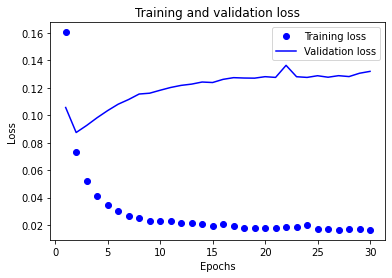

In [54]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

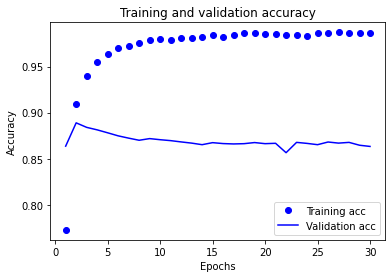

In [55]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [56]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers


model = keras.Sequential()
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh",activity_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])



Epoch 1/30
30/30 [==============================] - 4s 115ms/step - loss: 0.1743 - accuracy: 0.7849 - val_loss: 0.1060 - val_accuracy: 0.8796
Epoch 2/30
30/30 [==============================] - 2s 59ms/step - loss: 0.0863 - accuracy: 0.9118 - val_loss: 0.0977 - val_accuracy: 0.8843
Epoch 3/30
30/30 [==============================] - 2s 58ms/step - loss: 0.0617 - accuracy: 0.9363 - val_loss: 0.0981 - val_accuracy: 0.8821
Epoch 4/30
30/30 [==============================] - 2s 60ms/step - loss: 0.0495 - accuracy: 0.9501 - val_loss: 0.1007 - val_accuracy: 0.8780
Epoch 5/30
30/30 [==============================] - 2s 59ms/step - loss: 0.0422 - accuracy: 0.9563 - val_loss: 0.1038 - val_accuracy: 0.8718
Epoch 6/30
30/30 [==============================] - 2s 59ms/step - loss: 0.0349 - accuracy: 0.9667 - val_loss: 0.1232 - val_accuracy: 0.8539
Epoch 7/30
30/30 [==============================] - 2s 58ms/step - loss: 0.0334 - accuracy: 0.9653 - val_loss: 0.1107 - val_accuracy: 0.8693
Epoch 8/30
3

In [58]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/30
30/30 [==============================] - 3s 91ms/step - loss: 0.0130 - accuracy: 0.9875 - val_loss: 0.1364 - val_accuracy: 0.8576
Epoch 2/30
30/30 [==============================] - 2s 59ms/step - loss: 0.0136 - accuracy: 0.9871 - val_loss: 0.1327 - val_accuracy: 0.8604
Epoch 3/30
30/30 [==============================] - 2s 61ms/step - loss: 0.0129 - accuracy: 0.9879 - val_loss: 0.1353 - val_accuracy: 0.8572
Epoch 4/30
30/30 [==============================] - 2s 59ms/step - loss: 0.0151 - accuracy: 0.9853 - val_loss: 0.1334 - val_accuracy: 0.8588
Epoch 5/30
30/30 [==============================] - 2s 59ms/step - loss: 0.0126 - accuracy: 0.9876 - val_loss: 0.1297 - val_accuracy: 0.8634
Epoch 6/30
30/30 [==============================] - 2s 58ms/step - loss: 0.0137 - accuracy: 0.9867 - val_loss: 0.1312 - val_accuracy: 0.8605
Epoch 7/30
30/30 [==============================] - 2s 58ms/step - loss: 0.0133 - accuracy: 0.9870 - val_loss: 0.1336 - val_accuracy: 0.8608
Epoch 8/30
30

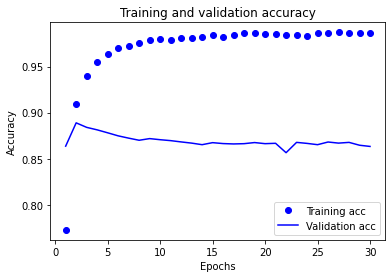

In [57]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

1. To test the performance, I used a 2, 3, and 6-layered neural network with 16, 64, and 64 hidden neurons. 
2. One significant finding I made was that, once it passes the threshold, it will train and perform essentially identically regardless of how many layers are stacked up.
3.Keras is a model. Sequential() It has the same organizational structure as input layer, hidden layers, and output layer. 
4.The initialization of the Sequential model, where we can stack layers, is done in the line above. model. Dense (64, Tanh activation) 
5. The above line indicates that we are using the tanh activation function to add a new hidden layer with 64 dense units.




6. When I refer to 64 hidden units, we can presume that I am referring to 64 neurons that are being formed in the layer to learn the vector-based input. 
7. The term "transfer function" also refers to the activation function. If the output range of the function is constrained, just sigmoid-squash the value to 1 that is above it. As non-linear functions, they. model.add(Dropout(0.5)) 
8. When we encounter an overfitting circumstance, the significance of Dropout is helpful. 
9.Hey, could you kindly drop off a few of my neurons at random, as it results in overfitting? When I say 0.5, it means that 50% of my neurons are no longer functioning. 
10. I've tried using L1 and L2 regularizes, but it hasn't had much of an impact; instead, performance has suffered.
11. My opinion is that the model is saturated, and the best validation accuracy we can obtain is between 86 and 87 percent. 
12.  To examine the performance metrics on the loss, binary crossentrophy was replaced with mean square error. 
13.  As a result, validation loss has done well. When using binary crossentrophy, the validation loss starts out at 0.5; however, when using mse, it drops to 0.1. 
14. The vanishing gradient problem makes Relu the best function among sigmoid and tanh functions. Tanh performs similarly to Tanh in this situation.

Summary:
1. When I combined 2 layers , 16 hidden units with tanh activation function and adam 

Training Accuracy:99.64

Validation Accuracy:86.82

2. When I combined 3 dense layers, 64 hidden units with tanh activation function and Dropouts (0.5), Regularizers and adam.

Training accuracy:98.69

Validation accuracy:86.33

3. When I combined 6 dense, 64 hidden units, Tanh activation function, Dropouts(0.5) and adam , regulizers as optimizers.

Training accuracy:98.89

validation accuracy:85.97

